## 深度學習理論上可以擬合任何函數?
- 實驗:
    - 模擬5個複雜度不相同的函數，試看深度學習是否可以擬合良好
- 可能遇到的困難:
    - 資料量大小是否足夠?
    - 模型複雜度是否足夠?
    - 一定要有非線性激勵激勵嗎?
- 參考
    - [知呼](https://www.zhihu.com/question/268384579)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [45]:
# 資料建立，透過一個函數建立不同函數的資料

def get_data(num_trains, num_tests, *args):
    base = 0
    x_train = np.random.randn(num_trains, 1)
    x_test = np.random.randn(num_tests, 1)
    y_train = np.zeros(x_train.shape)
    y_test = np.zeros(x_test.shape)
    
    for e in args[::-1]:
        y_train += e * (x_train**base)
        y_test += e * (x_test**base)
        base += 1
    
    return x_train, x_test, y_train, y_test



In [46]:
#  2x + 1 = y

num_trains = 10000
num_tests = 1000

x_train, x_test, y_train, y_test = get_data(num_trains, num_tests, 2, 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)


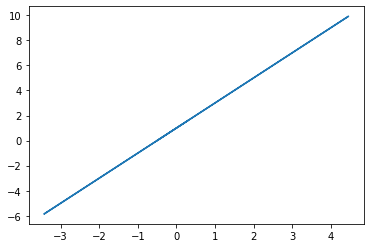

In [47]:
plt.plot(x_train, y_train)

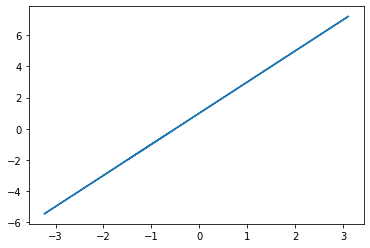

In [48]:
plt.plot(x_test, y_test)

In [49]:
# modeling

def get_model():

    inputs = keras.Input(shape=(1, ))
    x = keras.layers.Dense(units=16, activation='relu')(inputs)
    x = keras.layers.Dense(units=8, activation='relu')(x)
    outputs = keras.layers.Dense(units=1)(x)

    model = keras.Model(inputs, outputs)
    model.summary()
    return model

In [50]:
model = get_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 2.1155 - val_loss: 0.1840
Epoch 2/10
313/313 [==============================] - 0s 849us/step - loss: 0.0391 - val_loss: 0.0055
Epoch 3/10
313/313 [==============================] - 0s 

In [51]:
# predict

y_pred = model.predict(x_test)

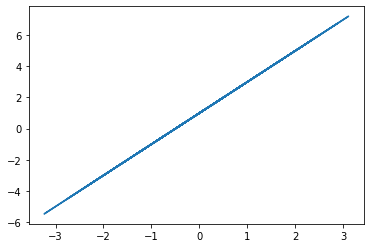

In [52]:
plt.plot(x_test, y_pred)

> 擬合得很好!

In [53]:
# 稍微複雜一點

x_train, x_test, y_train, y_test = get_data(num_trains, num_tests, 5, 4, 3, 2, 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)


In [54]:
model = get_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 3594.6523 - val_loss: 1331.3531
Epoch 2/10
313/313 [==============================] - 0s 910us/step - loss: 2986.6279 - val_loss: 993.6100
Epoch 3/10
313/313 [==========================

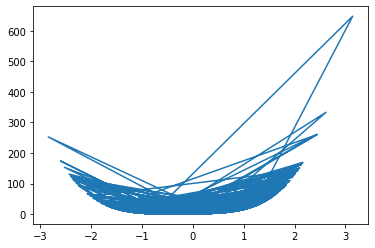

In [56]:
# real
plt.plot(x_test, y_test)

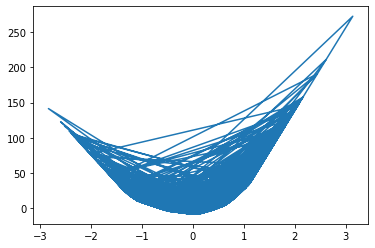

In [55]:
# pred
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred)

> 可以發現函數變得複雜，擬合得程度就稍微差了一些!

一般化一些!

In [61]:
def experiments(num_trains, num_tests, *args):

    # get data
    x_train, x_test, y_train, y_test = get_data(num_trains, num_tests, *args)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    # modeling
    model = get_model()
    model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
    model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

    # real
    plt.figure()
    plt.plot(x_test, y_test)
    plt.title('real')

    # pred
    plt.figure()
    y_pred = model.predict(x_test)
    plt.plot(x_test, y_pred)
    plt.title('pred')
    
    return model, x_train, x_test, y_train, y_test

(10000, 1) (1000, 1) (10000, 1) (1000, 1)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 0.5419 - val_loss: 0.0032
Epoch 2/10
313/313 [==============================] - 0s 839us/step - loss: 0.0011 - val_loss: 1.5091e-04
Epoch 3/10


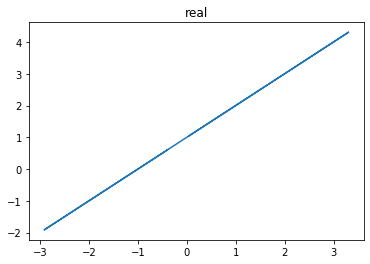

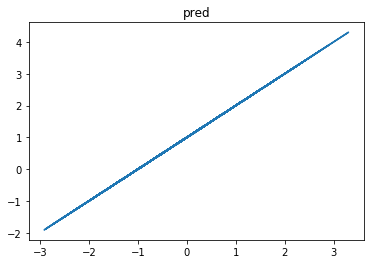

In [62]:
# x + 1 = y

model, x_train, x_test, y_train, y_test = experiments(10000, 1000, 1, 1)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 20.9787 - val_loss: 6.9293
Epoch 2/10
313/313 [==============================] - 0s 926us/step - loss: 4.7678 - val_loss: 3.2155
Epoch 3/10
313

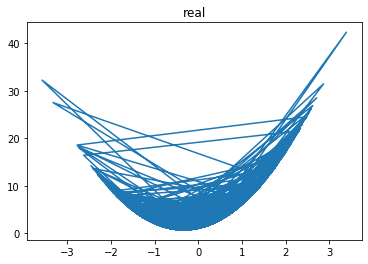

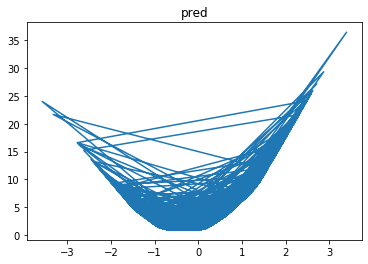

In [64]:
# 3x^2 + 2x + 1 = y

model, x_train, x_test, y_train, y_test = experiments(10000, 1000, 3, 2, 1)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 250.3750 - val_loss: 176.6889
Epoch 2/10
313/313 [==============================] - 0s 847us/step - loss: 142.0434 - val_loss: 122.8811
Epoch 3

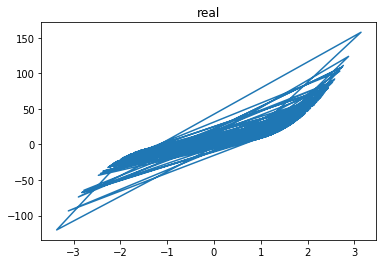

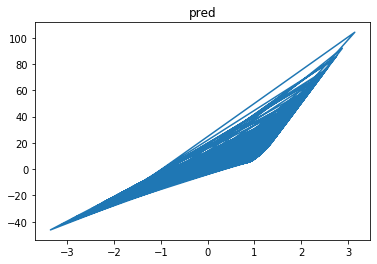

In [65]:
# 4x^3 + 3x^2 + x + 1 = y

model, x_train, x_test, y_train, y_test = experiments(10000, 1000, 4, 3, 1, 1)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 3672.8853 - val_loss: 3271.5513
Epoch 2/10
313/313 [==============================] - 0s 942us/step - loss: 3183.3452 - val_loss: 2657.4316
Ep

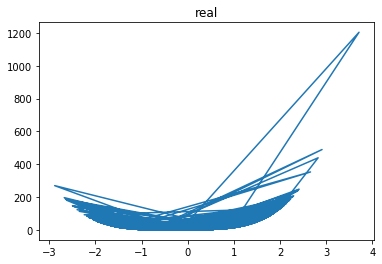

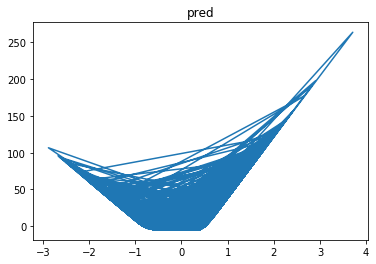

In [66]:
model, x_train, x_test, y_train, y_test = experiments(10000, 1000, 5, 4, 3, 2, 1)

(10000, 1) (1000, 1) (10000, 1) (1000, 1)
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 41396.0352 - val_loss: 47676.5508
Epoch 2/10
313/313 [==============================] - 0s 952us/step - loss: 39691.5312 - val_loss: 44068.703

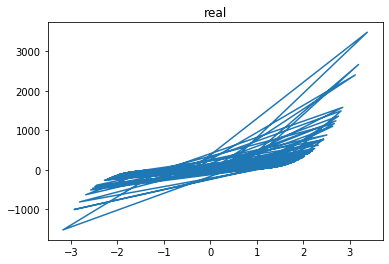

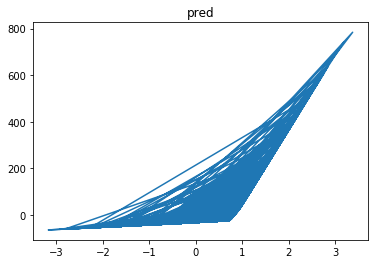

In [67]:
model, x_train, x_test, y_train, y_test = experiments(10000, 1000, 6, 5, 4, 3, 2, 1)